# Advanced Matplotlib!

Building a bit of a toolbox of some of the wicked cool things you can with Matplotlib!

## Matplotlib Animations

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

The general principle behind matplotlib animations is the `FuncAnimation()` - you give it a function to call (below, `animate(i)` that updates your data/plot based on a passed frame number

https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html

<IPython.core.display.Javascript object>


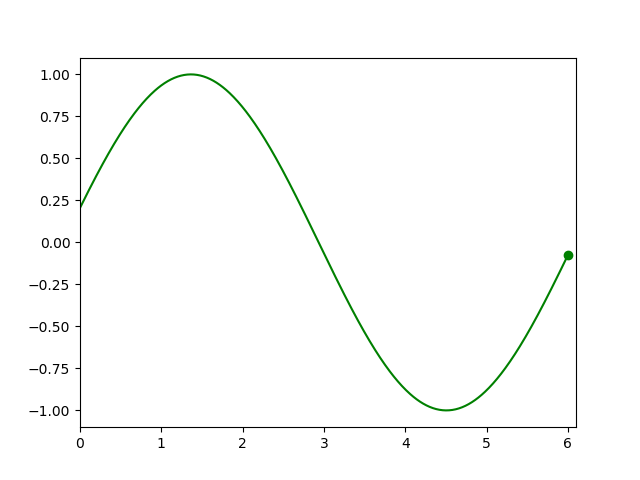

In [6]:
fig, ax = plt.subplots()

ax.set_xlim([0, 6.1])

# the data we'll be using
x = np.arange(0, 6, 0.01)
y = np.sin(x)

line, = ax.plot(x, y, color='green')
dot, = ax.plot(6, np.sin(5), 'o', color='green')


def animate(i):
    """A function that will be called every frame, where i is passed as the next frame number."""
    y = np.sin(x + i / 100)
    line.set_data(x, np.sin(x + i / 100))
    dot.set_data(6, np.sin(6 + i / 100))
    
# note that interval is the ms delay between frames
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=5) 

The above is really good because you can add in interactivity as in Tutorial 1. Speed and smoothness of the animation is based on processer power though, so if you want a cleaner "presentable" and non-interactive version, you can use an HTML renderer to process and then display a video of the animation.

In [7]:
from IPython.display import HTML

HTML(anim.to_html5_video())

# Cool Things With Interactive Map Data

[Data source](https://data.giss.nasa.gov/gistemp/) (Sufrace air temperature no ocean data)

Packages needed:
- netCDF4 (used for interacting with most map data) 
- basemap (matplotlib helper for drawing maps) NOTE: can't obtain through pip

In [36]:
from netCDF4 import Dataset, date2index, num2date
from mpl_toolkits.basemap import Basemap
from datetime import datetime

data = Dataset('data/gistemp250.nc')
data.variables

OrderedDict([('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  standard_name: latitude
                  long_name: Latitude
                  units: degrees_north
              unlimited dimensions: 
              current shape = (90,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lon', <class 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  standard_name: longitude
                  long_name: Longitude
                  units: degrees_east
              unlimited dimensions: 
              current shape = (180,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  long_name: time
                  units: days since 1800-01-01 00:00:00
                  bounds: time_bnds
              unlimited dimensions: 
              current shape = (1

### Sample map

NC files like this tend to have rather esoteric methods of storing information, like dates....here's one way of seeing what sorts of dates the data has

In [39]:
nctime = data.variables["time"][:]
units = data.variables["time"].units
num2date(nctime, units=unit)

array([datetime.datetime(1880, 1, 15, 0, 0),
       datetime.datetime(1880, 2, 15, 0, 0),
       datetime.datetime(1880, 3, 15, 0, 0), ...,
       datetime.datetime(2018, 7, 15, 0, 0),
       datetime.datetime(2018, 8, 15, 0, 0),
       datetime.datetime(2018, 9, 15, 0, 0)], dtype=object)

In [42]:
timeindex = date2index(datetime(2018, 1, 15), data.variables["time"])
lat = data.variables["lat"][:]
lon = data.variables["lon"][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

<IPython.core.display.Javascript object>


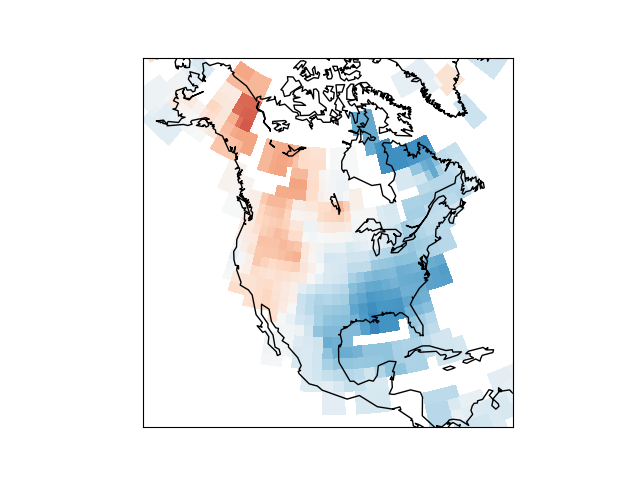

In [53]:
fig2, axes2 = plt.subplots()
m = Basemap(
    projection='lcc', 
    resolution='c', 
    width=8e6, 
    height=8e6,
    lat_0=45,
    lon_0=-100,
)

m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')

#plt.clim(-8, 8) # color scaling
m.drawcoastlines()


### Making it interactive

In [55]:
import ipywidgets as widgets
from ipywidgets import interact, interactive

<IPython.core.display.Javascript object>


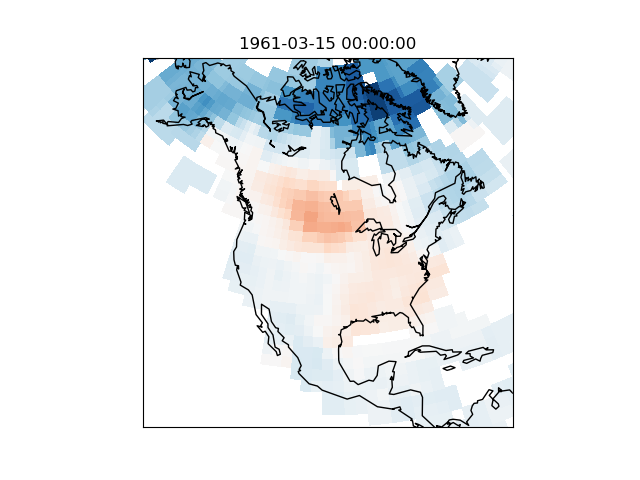

interactive(children=(IntSlider(value=0, description='timeline_index', max=1664), Output()), _dom_classes=('wi…

<function __main__.interactive_temp_date(timeline_index)>

In [63]:
def interactive_temp_date(timeline_index):
    axes3.clear()
    
    timeindex = date2index(timeline[timeline_index], data.variables["time"])
    lat = data.variables["lat"][:]
    lon = data.variables["lon"][:]
    lon, lat = np.meshgrid(lon, lat)
    temp_anomaly = data.variables['tempanomaly'][timeindex]
    
    m = Basemap(
        projection='lcc', 
        resolution='c', 
        width=8e6, 
        height=8e6,
        lat_0=45,
        lon_0=-100,
        ax=axes3
    )
    
    m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
    m.drawcoastlines()
    axes3.set_title(timeline[timeline_index])
    
timeline = num2date(nctime, units=unit)
fig3, axes3 = plt.subplots()
interact(interactive_temp_date, timeline_index=widgets.IntSlider(min=0,max=len(timeline)-1))

# Final Project!

<IPython.core.display.Javascript object>


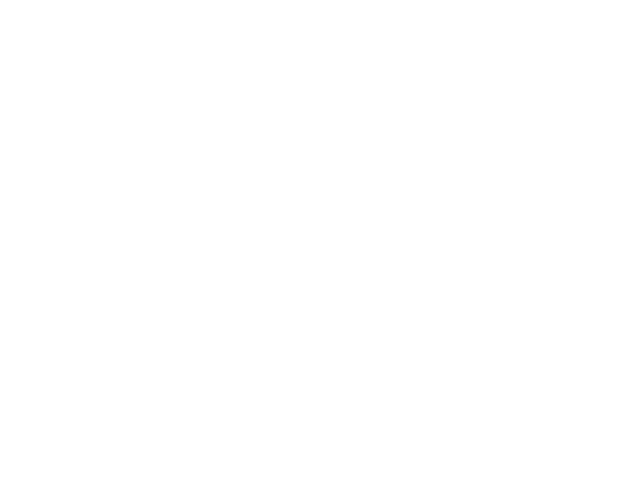

In [91]:
def animate_temp_date(timeline_index):
    axes4.clear()
    
    timeindex = date2index(timeline[timeline_index], data.variables["time"])
    lat = data.variables["lat"][:]
    lon = data.variables["lon"][:]
    lon, lat = np.meshgrid(lon, lat)
    temp_anomaly = data.variables['tempanomaly'][timeindex]
    
    m = Basemap(
        projection='lcc', 
        resolution='c', 
        width=8e6, 
        height=8e6,
        lat_0=45,
        lon_0=-100,
        ax=axes4
    )
    
    m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
    m.drawcoastlines()
    m.drawstates()
    axes4.set_title(timeline[timeline_index])
    
timeline = num2date(nctime, units=unit)[-24:]
fig4, axes4 = plt.subplots()

temperature_anim = animation.FuncAnimation(fig4, animate_temp_date, frames=len(timeline)-1, interval=500)
plt.close()

In [92]:
HTML(temperature_anim.to_html5_video())